In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [60]:
# Read Data Frame 
df = pd.read_csv("roo_data.csv")

In [61]:
# Renamming courses 
df.rename(columns = {'Percentage in Mathematics':'Percentage in Linear Algebra'}, inplace = True)
df.rename(columns = {'percentage in Algorithms':'Percentage in Data Structures & Algorithms'}, inplace = True)
df.rename(columns = {'Percentage in Communication skills':'Percentage in Introduction To The Study Of Literature'}, inplace = True)
df.rename(columns = {'Percentage in Electronics Subjects':'Percentage in Photonics: Fundamentals & Applications'}, inplace = True)
df.rename(columns = {'Percentage in Programming Concepts':'Percentage in Advanced Programming'}, inplace = True)

In [62]:
print("Info: \n")
df.info()                         

Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Acedamic percentage in Operating Systems               20000 non-null  int64 
 1   Percentage in Data Structures & Algorithms             20000 non-null  int64 
 2   Percentage in Advanced Programming                     20000 non-null  int64 
 3   Percentage in Software Engineering                     20000 non-null  int64 
 4   Percentage in Computer Networks                        20000 non-null  int64 
 5   Percentage in Photonics: Fundamentals & Applications   20000 non-null  int64 
 6   Percentage in Computer Architecture                    20000 non-null  int64 
 7   Percentage in Linear Algebra                           20000 non-null  int64 
 8   Percentage in Introduction To The Study Of Liter

In [63]:
# Print Dataframe
df.head()

,Acedamic percentage in Operating Systems,Percentage in Data Structures & Algorithms,Percentage in Advanced Programming,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Photonics: Fundamentals & Applications,Percentage in Computer Architecture,Percentage in Linear Algebra,Percentage in Introduction To The Study Of Literature,Hours working per day,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,...,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Database Developer
1,78,62,73,60,71,70,73,84,91,12,...,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,...,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,...,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,...,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Business Systems Analyst


# Preprocessing the Dataframe

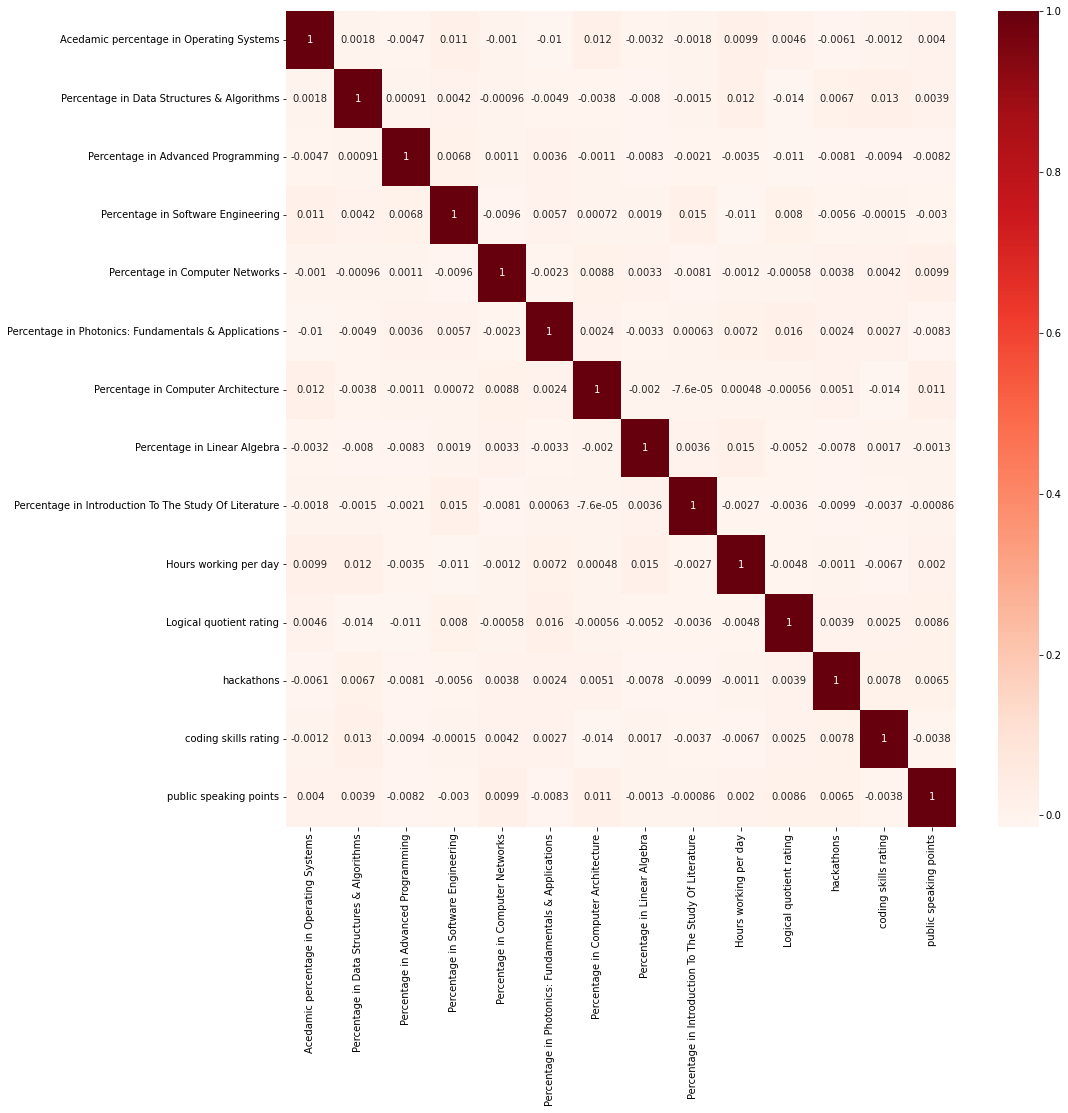

In [64]:
# Plot heatmap for correlations 
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Reds)   # heatmap to show the correaltion between columns 
plt.show()

In [65]:
# list all the coulmns
list(df.columns)

['Acedamic percentage in Operating Systems',
 'Percentage in Data Structures & Algorithms',
 'Percentage in Advanced Programming',
 'Percentage in Software Engineering',
 'Percentage in Computer Networks',
 'Percentage in Photonics: Fundamentals & Applications',
 'Percentage in Computer Architecture',
 'Percentage in Linear Algebra',
 'Percentage in Introduction To The Study Of Literature',
 'Hours working per day',
 'Logical quotient rating',
 'hackathons',
 'coding skills rating',
 'public speaking points',
 'can work long time before system?',
 'self-learning capability?',
 'Extra-courses did',
 'certifications',
 'workshops',
 'talenttests taken?',
 'olympiads',
 'reading and writing skills',
 'memory capability score',
 'Interested subjects',
 'interested career area ',
 'Job/Higher Studies?',
 'Type of company want to settle in?',
 'Taken inputs from seniors or elders',
 'interested in games',
 'Interested Type of Books',
 'Salary Range Expected',
 'In a Realtionship?',
 'Gentle 

In [66]:
# Drop columns based on correlations and requirement 
columns_to_drop = [ 'Hours working per day',
                 'can work long time before system?',
                 'self-learning capability?',
                 'talenttests taken?',
                 'olympiads',
                 'reading and writing skills',
                 'memory capability score',
                 'Type of company want to settle in?',
                 'Taken inputs from seniors or elders',
                 'interested in games',
                 'Interested Type of Books',
                 'Salary Range Expected',
                 'In a Realtionship?',
                 'Gentle or Tuff behaviour?',
                 'hard/smart worker',
                 'worked in teams ever?',
                 'Introvert']
                
df = df.drop(columns_to_drop, axis = 1)
df.shape

(20000, 22)

In [67]:
# See the unique values in Job Role column
df['Suggested Job Role'].unique()

array(['Database Developer', 'Portal Administrator',
       'Systems Security Administrator', 'Business Systems Analyst',
       'Software Systems Engineer', 'Business Intelligence Analyst',
       'CRM Technical Developer', 'Mobile Applications Developer',
       'UX Designer', 'Quality Assurance Associate', 'Web Developer',
       'Information Security Analyst', 'CRM Business Analyst',
       'Technical Support', 'Project Manager',
       'Information Technology Manager', 'Programmer Analyst',
       'Design & UX', 'Solutions Architect', 'Systems Analyst',
       'Network Security Administrator', 'Data Architect',
       'Software Developer', 'E-Commerce Analyst',
       'Technical Services/Help Desk/Tech Support',
       'Information Technology Auditor', 'Database Manager',
       'Applications Developer', 'Database Administrator',
       'Network Engineer', 'Software Engineer', 'Technical Engineer',
       'Network Security Engineer',
       'Software Quality Assurance (QA) / Testi

In [68]:
# club together simillar values 
replace_data_dev = ['Database Developer', 'Database Administrator', 'Database Manager', 'Data Architect']
df = df.replace(to_replace = replace_data_dev, value = 'Data Scientist')
replace_des = ['UX Designer', 'Applications Developer', 'Design & UX', 'Mobile Applications Developer', 'Quality Assurance Associate']
df = df.replace(to_replace = replace_des, value = 'UI/UX designer')
replace_eco = ['E-Commerce Analyst', 'Business Intelligence Analyst', 'Business Systems Analyst']
df = df.replace(to_replace = replace_eco, value = 'Economist')
replace_soft_dev = ['Software Systems Engineer', 'Software Developer', 'Software Engineer', 'Web Developer', 'Project Manager']
df = df.replace(to_replace = replace_soft_dev, value = 'Software Developer')
replace_crm = ['CRM Technical Developer', 'CRM Business Analyst', 'Software Quality Assurance (QA) / Testing', 'Portal Administrator', 'Programmer Analyst']
df = df.replace(to_replace = replace_crm, value = 'CRM')
replace_seq = ['Systems Security Administrator','Information Security Analyst', 'Systems Analyst', 'Solutions Architect']
df = df.replace(to_replace = replace_seq, value = 'Systems Security Management')
replace_tech = ['Technical Support',  'Technical Services/Help Desk/Tech Support', 'Technical Engineer', 'Information Technology Manager', 'Information Technology Auditor']
df = df.replace(to_replace = replace_tech, value = 'Technology Support')
replace_net = ['Network Security Administrator', 'Network Security Engineer', 'Network Engineer']
df = df.replace(to_replace = replace_net, value = 'Network Engineer')

In [69]:
print("Unique values : ", end='')
print(df['Suggested Job Role'].unique())
print(df['Suggested Job Role'].value_counts())

Unique values : ['Data Scientist' 'CRM' 'Systems Security Management' 'Economist'
 'Software Developer' 'UI/UX designer' 'Technology Support'
 'Network Engineer']
Software Developer             2924
CRM                            2844
UI/UX designer                 2831
Technology Support             2829
Network Engineer               2363
Data Scientist                 2308
Systems Security Management    2233
Economist                      1668
Name: Suggested Job Role, dtype: int64


In [70]:
df = df.replace(to_replace = 'Data Scientist', value = 0)
df = df.replace(to_replace = 'UI/UX designer', value = 1)
df = df.replace(to_replace = 'Economist', value = 2)
df = df.replace(to_replace = 'Software Developer', value = 3)
df = df.replace(to_replace = 'CRM', value = 4)
df = df.replace(to_replace = 'Systems Security Management', value = 5)
df = df.replace(to_replace = 'Technology Support', value = 6)
df = df.replace(to_replace = 'Network Engineer', value = 7)

In [71]:
list(df.columns)

['Acedamic percentage in Operating Systems',
 'Percentage in Data Structures & Algorithms',
 'Percentage in Advanced Programming',
 'Percentage in Software Engineering',
 'Percentage in Computer Networks',
 'Percentage in Photonics: Fundamentals & Applications',
 'Percentage in Computer Architecture',
 'Percentage in Linear Algebra',
 'Percentage in Introduction To The Study Of Literature',
 'Logical quotient rating',
 'hackathons',
 'coding skills rating',
 'public speaking points',
 'Extra-courses did',
 'certifications',
 'workshops',
 'Interested subjects',
 'interested career area ',
 'Job/Higher Studies?',
 'Management or Technical',
 'Salary/work',
 'Suggested Job Role']

In [72]:
#catergorizing the values of percentage columns and rating columns

percentage_col = ['Acedamic percentage in Operating Systems',
                    'Percentage in Data Structures & Algorithms',
                    'Percentage in Advanced Programming',
                    'Percentage in Software Engineering',
                    'Percentage in Computer Networks',
                    'Percentage in Photonics: Fundamentals & Applications',
                    'Percentage in Computer Architecture',
                    'Percentage in Linear Algebra',
                    'Percentage in Introduction To The Study Of Literature']

df1_without_class = df.copy(deep=True)

for i in percentage_col:
    for j in range(0, df.shape[0]):
        if(df[i][j] <= 33):
            df[i][j] = 'F'
        elif(df[i][j] <= 70):
            df[i][j] = 'C'
        elif(df[i][j] <= 80):
            df[i][j] = 'B'
        elif(df[i][j] <= 100):
            df[i][j] = 'A'
            
            
rating_col = ['Logical quotient rating', 'coding skills rating', 'public speaking points']
for i in rating_col:
    for j in range(0, df.shape[0]):
        if(df[i][j] <= 3):
            df[i][j] = 'F'
        elif(df[i][j] <= 6):
            df[i][j] = 'C'
        elif(df[i][j] <= 8):
            df[i][j] = 'B'
        elif(df[i][j] <= 10):
            df[i][j] = 'A'

C:\Users\Sharm\AppData\Local\Temp\ipykernel_2392\276893553.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][j] = 'C'
C:\Users\Sharm\AppData\Local\Temp\ipykernel_2392\276893553.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][j] = 'B'
C:\Users\Sharm\AppData\Local\Temp\ipykernel_2392\276893553.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][j] = 'A'
C:\Users\Sharm\AppData\Local\Temp\ipykernel_2392\276893553

In [73]:
# label encoding the features 
from sklearn import preprocessing
feature_label_encoder = preprocessing.LabelEncoder()

features = ['Acedamic percentage in Operating Systems',
                    'Percentage in Data Structures & Algorithms',
                    'Percentage in Advanced Programming',
                    'Percentage in Software Engineering',
                    'Percentage in Computer Networks',
                    'Percentage in Photonics: Fundamentals & Applications',
                    'Percentage in Computer Architecture',
                    'Percentage in Linear Algebra',
                    'Percentage in Introduction To The Study Of Literature',
                    'Logical quotient rating', 
                    'coding skills rating', 
                    'public speaking points',
                    'Extra-courses did',
                    'workshops',
                    'certifications',
                    'hackathons',
                    'Interested subjects',
                    'interested career area ',
                    'Job/Higher Studies?',
                    'Salary/work',
                    'Management or Technical']

for i in features:
    df[i] = feature_label_encoder.fit_transform(df[i])

In [74]:
for i in list(df.columns):
    print(i)
    print(df[i].value_counts())
    print("-------------------------------------------")

Acedamic percentage in Operating Systems
0    7943
2    6279
1    5778
Name: Acedamic percentage in Operating Systems, dtype: int64
-------------------------------------------
Percentage in Data Structures & Algorithms
0    7974
2    6341
1    5685
Name: Percentage in Data Structures & Algorithms, dtype: int64
-------------------------------------------
Percentage in Advanced Programming
0    8062
2    6287
1    5651
Name: Percentage in Advanced Programming, dtype: int64
-------------------------------------------
Percentage in Software Engineering
0    8089
2    6216
1    5695
Name: Percentage in Software Engineering, dtype: int64
-------------------------------------------
Percentage in Computer Networks
0    7967
2    6265
1    5768
Name: Percentage in Computer Networks, dtype: int64
-------------------------------------------
Percentage in Photonics: Fundamentals & Applications
0    8037
2    6304
1    5659
Name: Percentage in Photonics: Fundamentals & Applications, dtype: int64
--

In [75]:
print("Info: \n")
df.info()   

Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                                                 Non-Null Count  Dtype
---  ------                                                 --------------  -----
 0   Acedamic percentage in Operating Systems               20000 non-null  int32
 1   Percentage in Data Structures & Algorithms             20000 non-null  int32
 2   Percentage in Advanced Programming                     20000 non-null  int32
 3   Percentage in Software Engineering                     20000 non-null  int32
 4   Percentage in Computer Networks                        20000 non-null  int32
 5   Percentage in Photonics: Fundamentals & Applications   20000 non-null  int32
 6   Percentage in Computer Architecture                    20000 non-null  int32
 7   Percentage in Linear Algebra                           20000 non-null  int32
 8   Percentage in Introduction To The Study Of Literature  200

# Experimenting With the values

Experimenting with the column values to find best combination of features -  
Result: The change in the accuracy was marginal. The NN itself choose the features by setting the values of the weights to zero. 

In [76]:
print("dataframe shape : ",df.shape)
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

train_x, test_x, train_y, test_y = train_test_split(df.drop('Suggested Job Role', axis = 1), df['Suggested Job Role'], test_size = 0.3, shuffle = True)

model = MLPClassifier(activation='tanh', solver = 'sgd',max_iter = 250, hidden_layer_sizes = (256, 128, 64, 32), early_stopping = False, validation_fraction=0.001)
model.fit(train_x.values, train_y.values.ravel())
pred_y = model.predict(test_x.values)

print("Accuracy Score = ", accuracy_score(test_y.values, pred_y))

dataframe shape :  (20000, 22)
Accuracy Score =  0.133


C:\Users\Sharm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


In [77]:
columns_to_drop = ['Logical quotient rating', 'hackathons', 'coding skills rating', 'public speaking points', 
            'certifications', 'workshops', 'Job/Higher Studies?', 'Management or Technical', 'Salary/work']

df_1 = df.drop(columns_to_drop, axis = 1)
print("dataframe shape : ",df_1.shape)

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

train_x, test_x, train_y, test_y = train_test_split(df_1.drop('Suggested Job Role', axis = 1), df_1['Suggested Job Role'], test_size = 0.3, shuffle = True)

model = MLPClassifier(activation='tanh', solver = 'sgd',max_iter = 250, hidden_layer_sizes = (256, 128, 64, 32), early_stopping = False, validation_fraction=0.001)
model.fit(train_x.values, train_y.values.ravel())
pred_y = model.predict(test_x.values)

print("Accuracy Score = ", accuracy_score(test_y.values, pred_y))

dataframe shape :  (20000, 13)
Accuracy Score =  0.14216666666666666


C:\Users\Sharm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Experimenting with the values of the columns -  
Result: The change in the accuracy was marginal. The NN itself choose the features by setting the values of the weights to zero. 

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

train_x, test_x, train_y, test_y = train_test_split(df.drop('Suggested Job Role', axis = 1), df['Suggested Job Role'], test_size = 0.3, shuffle = True)

model = MLPClassifier(activation='tanh', solver = 'sgd',max_iter = 250, hidden_layer_sizes = (256, 128, 64, 32), early_stopping = False, validation_fraction=0.001)
model.fit(train_x.values, train_y.values.ravel())
pred_y = model.predict(test_x.values)
print('Label Encoded')
print("Accuracy Score = ", accuracy_score(test_y.values, pred_y))

Label Encoded
Accuracy Score =  0.134


C:\Users\Sharm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import accuracy_score

# train_x, test_x, train_y, test_y = train_test_split(df1_without_class.drop('Suggested Job Role', axis = 1), df1_without_class['Suggested Job Role'], test_size = 0.3, shuffle = True)

# model = MLPClassifier(activation='tanh', solver = 'sgd',max_iter = 250, hidden_layer_sizes = (256, 128, 64, 32), early_stopping = False, validation_fraction=0.001)
# model.fit(train_x.values, train_y.values.ravel())
# pred_y = model.predict(test_x.values)

# print('Without Label Encoding')
# print("Accuracy Score = ", accuracy_score(test_y.values, pred_y))



Performed Grid search to find the best combinations of the parameters 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV

# Using 80:20 split 
train_x, test_x, train_y, test_y = train_test_split(df.drop('Suggested Job Role', axis = 1), df['Suggested Job Role'], test_size = 0.2, shuffle = True)
model1 = MLPClassifier()


pram = {
    'activation' : ['logistic', 'relu', 'tanh', 'identity'],
    'solver' : ['sgd','adam'],
    'hidden_layer_sizes' : [(256, 128, 64, 32, 16),(256, 128, 64, 32),(200, 150, 100, 50),(500, 400, 300, 200)],
    'learning_rate_init' : [0.1, 0.01, 0.001],
    'max_iter' : [100, 250, 500, 750, 1000]
}

grid_m = GridSearchCV(model1, pram, n_jobs= -1, cv = 3)
grid_m.fit(train_x, train_y)

y_pred = grid_m.predict(test_x)

print("Best Estimator: ",grid_m.best_estimator_)
print("Best Score : ", grid_m.best_score_)
print("Best parameters : ",grid_m.best_params_)

y_pred_train = grid_m.predict(train_x)
y_pred_test = grid_m.predict(test_x)
acc_train = accuracy_score(train_y,y_pred_train)
acc_test = accuracy_score(test_y,y_pred_test)

y_prob_train = grid_m.predict_proba(train_x)
y_prob_test = grid_m.predict_proba(test_x)
loss_train = log_loss(train_y,y_prob_train)
loss_test = log_loss(test_y,y_prob_test)

print("Training accuracy : ", acc_train)
print("Testing accuracy : ", acc_test)
print("Training loss", loss_train)
print("Testing loss", loss_test)

# 60-40 Split

In [79]:
# Train Test split 
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df.drop('Suggested Job Role', axis = 1), df['Suggested Job Role'], test_size = 0.4, shuffle = True)

In [80]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(activation='tanh', solver = 'sgd',max_iter = 100, hidden_layer_sizes = (64, 32, 16), early_stopping = False, validation_fraction=0.001, verbose = 1)
model.fit(train_x.values, train_y.values.ravel())
pred_y = model.predict(test_x.values)

Iteration 1, loss = 2.19744881
Iteration 2, loss = 2.10064026
Iteration 3, loss = 2.08609753
Iteration 4, loss = 2.07981386
Iteration 5, loss = 2.07637952
Iteration 6, loss = 2.07357687
Iteration 7, loss = 2.07161785
Iteration 8, loss = 2.07026400
Iteration 9, loss = 2.06898462
Iteration 10, loss = 2.06801376
Iteration 11, loss = 2.06735361
Iteration 12, loss = 2.06659268
Iteration 13, loss = 2.06606738
Iteration 14, loss = 2.06551284
Iteration 15, loss = 2.06502274
Iteration 16, loss = 2.06452284
Iteration 17, loss = 2.06413612
Iteration 18, loss = 2.06386342
Iteration 19, loss = 2.06364252
Iteration 20, loss = 2.06328154
Iteration 21, loss = 2.06312719
Iteration 22, loss = 2.06274036
Iteration 23, loss = 2.06257741
Iteration 24, loss = 2.06241426
Iteration 25, loss = 2.06216952
Iteration 26, loss = 2.06198861
Iteration 27, loss = 2.06179712
Iteration 28, loss = 2.06166555
Iteration 29, loss = 2.06149445
Iteration 30, loss = 2.06135857
Iteration 31, loss = 2.06112981
Iteration 32, los

C:\Users\Sharm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [81]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusionmatrix_60 = confusion_matrix(test_y, pred_y)
print("Confusion matrix = \n",confusionmatrix_60)
print("-------------------------------------------")
print("Accuracy Score = ", accuracy_score(test_y, pred_y))
print("-------------------------------------------")
print("Class wise accuracy")
temp = confusionmatrix_60.diagonal()/confusionmatrix_60.sum(axis=1)
i = 0
for j in temp:
    print("Class "+str(i)+" : "+str(j))
    i = i+1
print("-------------------------------------------")
print("Classification Report")
print(classification_report(test_y, pred_y))

Confusion matrix = 
 [[  0 197   0 399 146   4 189   5]
 [  0 224   0 506 154   2 219   5]
 [  1 153   0 283 104   7 141   6]
 [  0 244   0 479 198   3 197   5]
 [  1 243   0 452 189   2 232   7]
 [  0 195   0 385 169   6 183   2]
 [  1 237   0 493 176   4 219   5]
 [  0 206   0 390 141   3 181   7]]
-------------------------------------------
Accuracy Score =  0.1405
-------------------------------------------
Class wise accuracy
Class 0 : 0.0
Class 1 : 0.2018018018018018
Class 2 : 0.0
Class 3 : 0.42539964476021314
Class 4 : 0.16785079928952043
Class 5 : 0.006382978723404255
Class 6 : 0.19295154185022026
Class 7 : 0.007543103448275862
-------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       940
           1       0.13      0.20      0.16      1110
           2       0.00      0.00      0.00       695
           3       0.14      0.43      0.21      1126
           4       

C:\Users\Sharm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sharm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sharm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 70-30 Split

In [82]:
# Train Test split 
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df.drop('Suggested Job Role', axis = 1), df['Suggested Job Role'], test_size = 0.3, shuffle = True)

In [83]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(activation='tanh', solver = 'sgd',max_iter = 100, hidden_layer_sizes = (64, 32, 16), early_stopping = False, validation_fraction=0.001, verbose = 1)
model.fit(train_x.values, train_y.values.ravel())
pred_y = model.predict(test_x.values)

Iteration 1, loss = 2.19687062
Iteration 2, loss = 2.11332358
Iteration 3, loss = 2.09790063
Iteration 4, loss = 2.09082074
Iteration 5, loss = 2.08648551
Iteration 6, loss = 2.08295724
Iteration 7, loss = 2.08012193
Iteration 8, loss = 2.07812368
Iteration 9, loss = 2.07613246
Iteration 10, loss = 2.07452050
Iteration 11, loss = 2.07323804
Iteration 12, loss = 2.07197076
Iteration 13, loss = 2.07103557
Iteration 14, loss = 2.07023964
Iteration 15, loss = 2.06957300
Iteration 16, loss = 2.06885896
Iteration 17, loss = 2.06813364
Iteration 18, loss = 2.06770496
Iteration 19, loss = 2.06722122
Iteration 20, loss = 2.06678332
Iteration 21, loss = 2.06627671
Iteration 22, loss = 2.06607424
Iteration 23, loss = 2.06572031
Iteration 24, loss = 2.06532757
Iteration 25, loss = 2.06509479
Iteration 26, loss = 2.06475524
Iteration 27, loss = 2.06465529
Iteration 28, loss = 2.06413684
Iteration 29, loss = 2.06399197
Iteration 30, loss = 2.06390921
Iteration 31, loss = 2.06360052
Iteration 32, los

C:\Users\Sharm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [84]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusionmatrix_70 = confusion_matrix(test_y, pred_y)
print("Confusion matrix = \n",confusionmatrix_70)
print("-------------------------------------------")
print("Accuracy Score = ", accuracy_score(test_y, pred_y))
print("-------------------------------------------")
print("Class wise accuracy")
temp = confusionmatrix_70.diagonal()/confusionmatrix_70.sum(axis=1)
i = 0
for j in temp:
    print("Class "+str(i)+" : "+str(j))
    i = i+1
print("-------------------------------------------")
print("Classification Report")
print(classification_report(test_y, pred_y))

Confusion matrix = 
 [[ 14 145   0 152 191   3 111  49]
 [ 24 178   0 194 227   7 145  51]
 [ 13 102   0 149 158   2  79  23]
 [ 20 196   0 196 267   5 164  60]
 [ 17 169   0 194 251   9 149  62]
 [ 16 138   0 150 187   3 137  43]
 [ 21 161   0 207 263   4 168  51]
 [ 20 132   0 159 187   5 133  39]]
-------------------------------------------
Accuracy Score =  0.1415
-------------------------------------------
Class wise accuracy
Class 0 : 0.021052631578947368
Class 1 : 0.21549636803874092
Class 2 : 0.0
Class 3 : 0.21585903083700442
Class 4 : 0.29494712103407755
Class 5 : 0.004451038575667656
Class 6 : 0.192
Class 7 : 0.057777777777777775
-------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.10      0.02      0.03       665
           1       0.15      0.22      0.17       826
           2       0.00      0.00      0.00       526
           3       0.14      0.22      0.17       908
           4   

C:\Users\Sharm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sharm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sharm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 90-10 Split

In [85]:
# Train Test split 
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df.drop('Suggested Job Role', axis = 1), df['Suggested Job Role'], test_size = 0.1, shuffle = True)

In [86]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(activation='tanh', solver = 'sgd',max_iter = 100, hidden_layer_sizes = (64, 32, 16), early_stopping = False, validation_fraction=0.001, verbose = 1)
model.fit(train_x.values, train_y.values.ravel())
pred_y = model.predict(test_x.values)

Iteration 1, loss = 2.12636899
Iteration 2, loss = 2.08905052
Iteration 3, loss = 2.08207767
Iteration 4, loss = 2.07811739
Iteration 5, loss = 2.07549727
Iteration 6, loss = 2.07362799
Iteration 7, loss = 2.07211229
Iteration 8, loss = 2.07098585
Iteration 9, loss = 2.07007420
Iteration 10, loss = 2.06925397
Iteration 11, loss = 2.06862365
Iteration 12, loss = 2.06795903
Iteration 13, loss = 2.06746866
Iteration 14, loss = 2.06697542
Iteration 15, loss = 2.06665260
Iteration 16, loss = 2.06623454
Iteration 17, loss = 2.06592592
Iteration 18, loss = 2.06567971
Iteration 19, loss = 2.06544729
Iteration 20, loss = 2.06516156
Iteration 21, loss = 2.06496523
Iteration 22, loss = 2.06473981
Iteration 23, loss = 2.06453746
Iteration 24, loss = 2.06436912
Iteration 25, loss = 2.06412928
Iteration 26, loss = 2.06396444
Iteration 27, loss = 2.06382773
Iteration 28, loss = 2.06367803
Iteration 29, loss = 2.06367306
Iteration 30, loss = 2.06338242
Iteration 31, loss = 2.06334790
Iteration 32, los

C:\Users\Sharm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [87]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusionmatrix_90 = confusion_matrix(test_y, pred_y)
print("Confusion matrix = \n",confusionmatrix_90)
print("-------------------------------------------")
print("Accuracy Score = ", accuracy_score(test_y, pred_y))
print("-------------------------------------------")

print("Class wise accuracy")
temp = confusionmatrix_90.diagonal()/confusionmatrix_90.sum(axis=1)
i = 0
for j in temp:
    print("Class "+str(i)+" : "+str(j))
    i = i+1
print("-------------------------------------------")
print("Classification Report")
print(classification_report(test_y, pred_y))

Confusion matrix = 
 [[ 2 55  0 59 81  0 67  0]
 [ 0 65  0 73 83  2 60  1]
 [ 3 36  0 41 51  0 47  0]
 [ 4 62  0 49 87  0 68  0]
 [ 3 49  0 55 77  0 89  2]
 [ 1 50  0 56 67  0 56  2]
 [ 1 58  0 79 67  0 60  2]
 [ 1 50  0 75 63  0 39  2]]
-------------------------------------------
Accuracy Score =  0.1275
-------------------------------------------
Class wise accuracy
Class 0 : 0.007575757575757576
Class 1 : 0.22887323943661972
Class 2 : 0.0
Class 3 : 0.1814814814814815
Class 4 : 0.28
Class 5 : 0.0
Class 6 : 0.2247191011235955
Class 7 : 0.008695652173913044
-------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.13      0.01      0.01       264
           1       0.15      0.23      0.18       284
           2       0.00      0.00      0.00       178
           3       0.10      0.18      0.13       270
           4       0.13      0.28      0.18       275
           5       0.00      0.00      0.00  

C:\Users\Sharm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sharm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sharm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
